## Remaining Battery Life🔋🪫Prediction

The Hawaii Natural Energy Institute conducted an analysis on 14 NMC-LCO 18650 batteries, each with a nominal capacity of 2.8 Ah. These batteries underwent over 1000 charge-discharge cycles at a temperature of 25°C, using a constant current-constant voltage (CC-CV) charging method at a C/2 rate and a discharge rate of 1.5C.

<img align=left width=550px src='https://apmonitor.com/pds/uploads/Main/battery_life.png'>

Data

 - Cycle Index: number of cycle
 - F1: Discharge Time (s)
 - F2: Time at 4.15V (s)
 - F3: Time Constant Current (s)
 - F4: Decrement 3.6-3.4V (s)
 - F5: Max. Voltage Discharge (V)
 - F6: Min. Voltage Charge (V)
 - F7: Charging Time (s)
 - Total time (s)
 - RUL: target

See full [problem statement](https://apmonitor.com/pds/index.php/Main/BatteryLife).

### Import Packages and Battery Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'http://apmonitor.com/pds/uploads/Main/'
url = ''
data = pd.read_csv(url+"battery_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


Shorten column names

In [2]:
data.columns = ['Cycle','Disch_s','Dec_3.6-3.4','MaxVD','MinVC','T4.15V','TCC_s','Charge_s','RUL']

Summarize the data

In [3]:
data.describe()

,Cycle,Disch_s,Dec_3.6-3.4,MaxVD,MinVC,T4.15V,TCC_s,Charge_s,RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Create new ID Column to Identify 14 Batteries

In [4]:
data['ID']= 0 
count = [] ; ID=1
for rul in data['RUL']:
    count.append(ID)
    # increment when RUL == 0
    if rul == 0:
        ID+=1
data['ID'] = count

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Filter Data

There are many bad measurements as shown in the line plot. Data rows with bad values need to be removed.

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

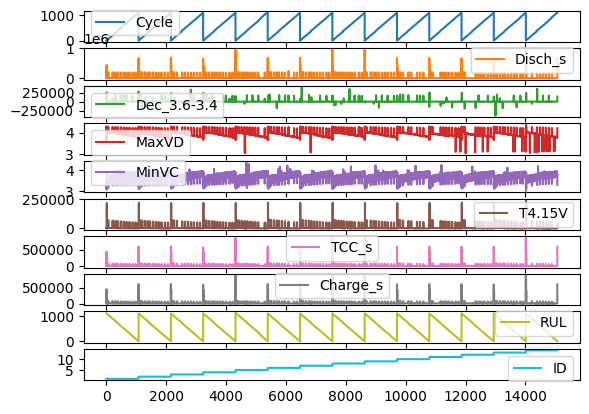

In [5]:
data.plot(subplots=True)

Remove bad values with upper and lower validity limits. A more automated approach could reject values based on rate of change or knowledge of physical constraints that would lead to elimination of data rows. 

In [6]:
data = data[(data['Disch_s']<2500) & (data['Disch_s']>500)]
data = data[(data['MaxVD']<4.1) & (data['MaxVD']>3.7)]
data = data[(data['MinVC']<4.05)]
data = data[(data['TCC_s']<7000)]

Fewer outliers as shown with line and box plots.

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

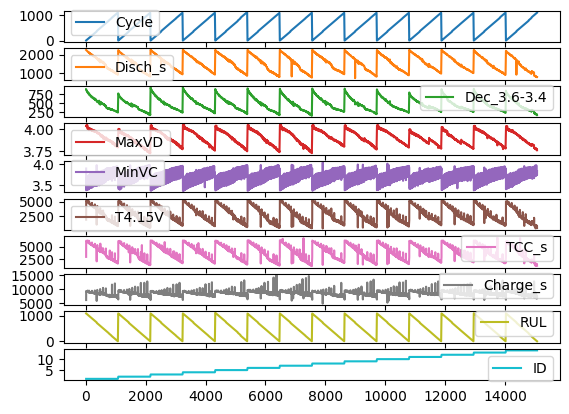

In [7]:
data.plot(subplots=True)


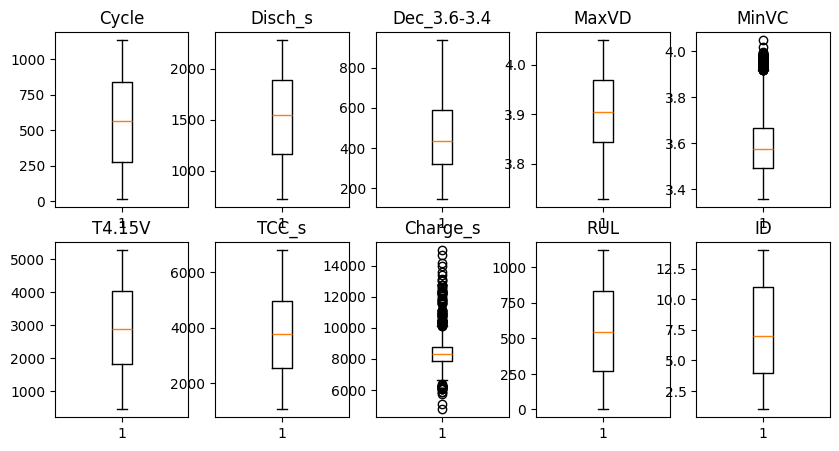

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i,c in enumerate(data.columns):
    plt.subplot(2,5,i+1)
    plt.title(c)
    plt.boxplot(data[c])
plt.show()

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Pair Plot

A pair plot shows the correlation between variables.

```python
sns.pairplot(data)
```

It has bar distributions on the diagonal and scatter plots on the off-diagonal. A pair plot also shows a different color (`hue`) by category `ID`. Pair plots show correlations between pairs of variables that may be related and gives a good indication of features (explanatory inputs) that are used for classification or regression. Reduce data by 10x to help with plot speed.

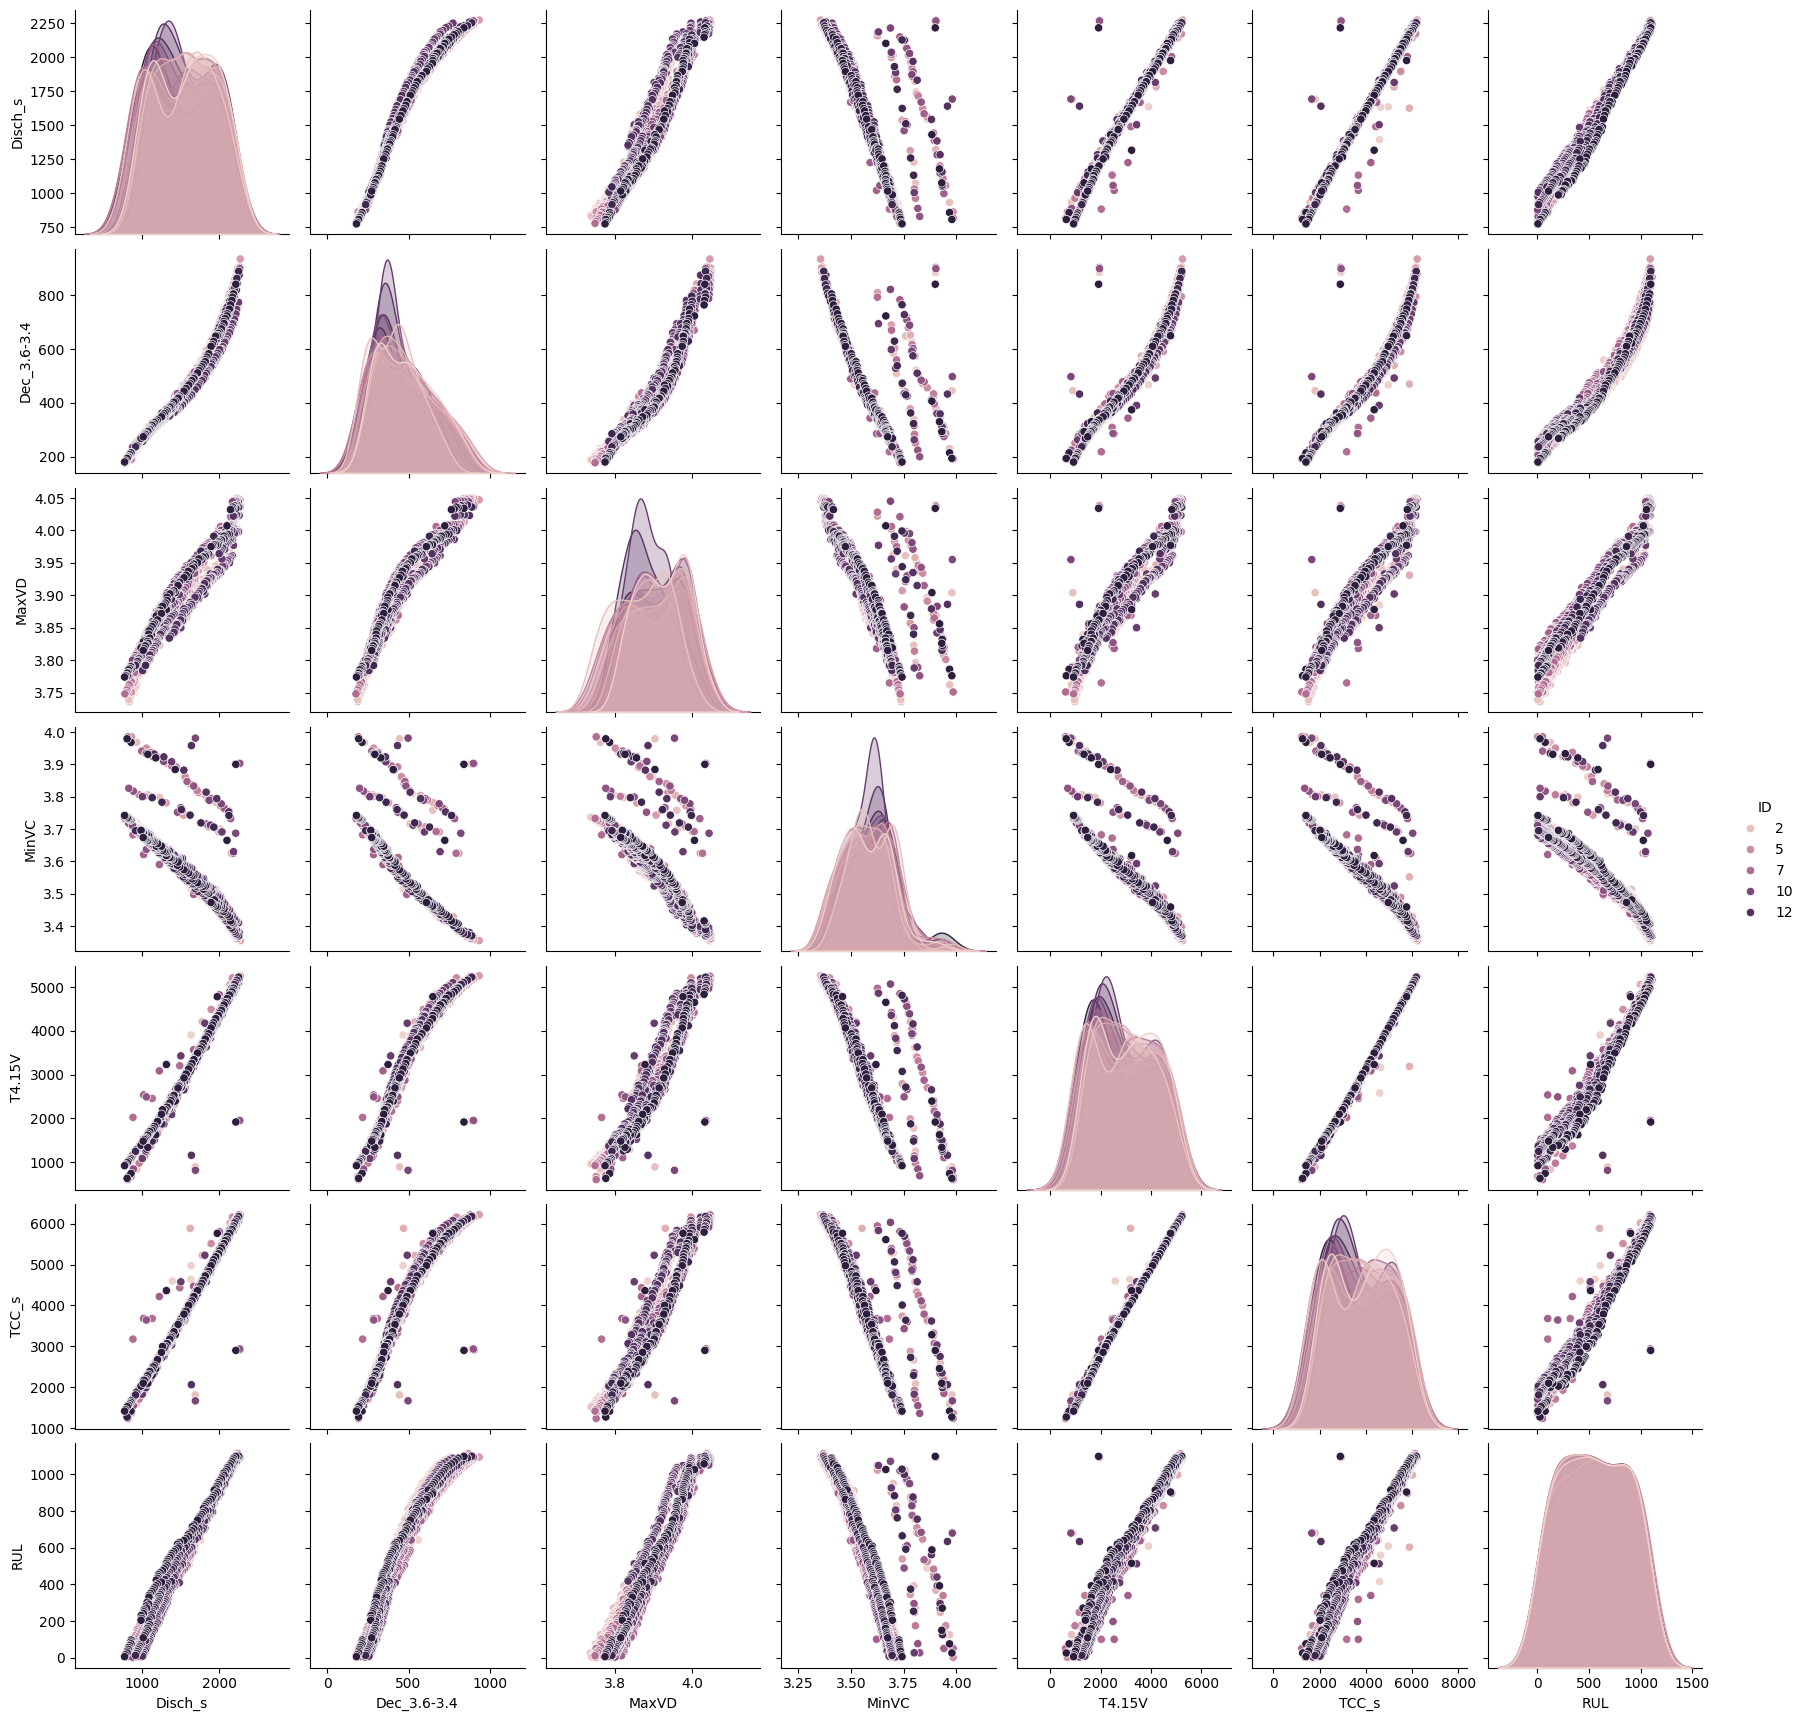

In [9]:
dr = data.iloc[::10]
sns.pairplot(dr[['Disch_s','Dec_3.6-3.4','MaxVD','MinVC','T4.15V','TCC_s','RUL','ID']],hue='ID')

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Joint Plot

A joint plot shows two variables, with the univariate and joint distributions.

```python
sns.jointplot(x='MaxVD',y='RUL',data=data,kind="kde")
```

Try `kind='reg'`, `'kde'`, and `'hex'` to see different joint plot styles.

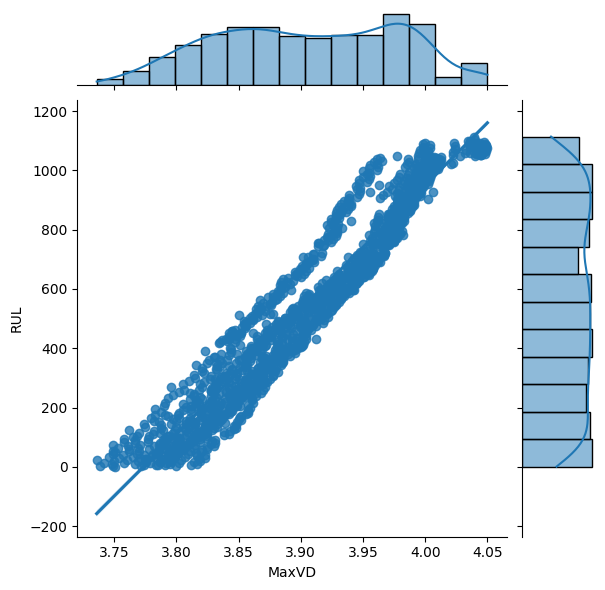

In [10]:
sns.jointplot(x='MaxVD',y='RUL',data=dr,kind="reg")

Create a correlation heat map

```python
plt.figure(figsize=(10,8))
cor = data.corr()
sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)
plt.show()
```

to examine the correlation among the variables. Which have the strongest correlation to `RUL`?

In [11]:
plt.figure(figsize=(10,8))
cor = dr.corr()
cor

,Cycle,Disch_s,Dec_3.6-3.4,MaxVD,MinVC,T4.15V,TCC_s,Charge_s,RUL,ID
Cycle,1.000000,-0.988516,-0.964206,-0.960328,0.780609,-0.972367,-0.973764,-0.724970,-0.999752,-0.006367
Disch_s,-0.988516,1.000000,0.975217,0.962360,-0.791724,0.982322,0.983770,0.726102,0.988599,-0.029617
Dec_3.6-3.4,-0.964206,0.975217,1.000000,0.960266,-0.786774,0.964263,0.960851,0.703531,0.964467,-0.039670
MaxVD,-0.960328,0.962360,0.960266,1.000000,-0.785380,0.949685,0.950598,0.662866,0.960400,-0.013534
MinVC,0.780609,-0.791724,-0.786774,-0.785380,1.000000,-0.843895,-0.833705,-0.612823,-0.780399,0.036838
T4.15V,-0.972367,0.982322,0.964263,0.949685,-0.843895,1.000000,0.998049,0.781017,0.972453,-0.029893
TCC_s,-0.973764,0.983770,0.960851,0.950598,-0.833705,0.998049,1.000000,0.792284,0.973836,-0.031678
Charge_s,-0.724970,0.726102,0.703531,0.662866,-0.612823,0.781017,0.792284,1.000000,0.724486,0.057385
RUL,-0.999752,0.988599,0.964467,0.960400,-0.780399,0.972453,0.973836,0.724486,1.000000,0.004539
ID,-0.006367,-0.029617,-0.039670,-0.013534,0.036838,-0.029893,-0.031678,0.057385,0.004539,1.000000


<Figure size 1000x800 with 0 Axes>

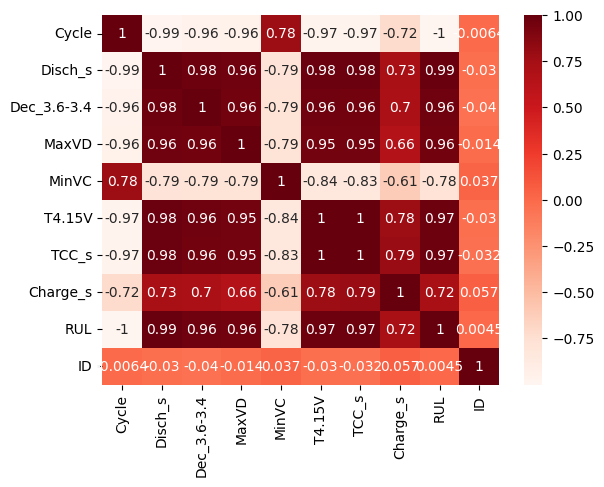

In [12]:
sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)
plt.show()

### Regression

The is objective is to minimize a loss function such as a sum of squared errors between the measured and predicted values:

$Loss = \sum_{i=1}^{n}\left(y_i-z_i\right)^2$

where `n` is the number of observations. Regression requires labelled data (output values) for training.

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Linear Regression

There are many model forms such as linear, polynomial, and nonlinear. A familiar linear model is a line with slope `a` and intercept `b` with `y = a x + b`.   
    
```python
x = data['MaxVD'].values
z = data['RUL'].values
p1 = np.polyfit(x,z,1)
```
    
A simple method for linear regression is with `numpy` to fit `p=np.polyfit(x,y,1)` and evaluate `np.polyval(p,x)` the model. Determine the slope and intercept that minimize the sum of squared errors (least squares) between the predicted `lnMFR` and measured `lnMFR` output using `H2R` as the input.

Slope, Intercept:[  4197.94012466 -15841.32579335]


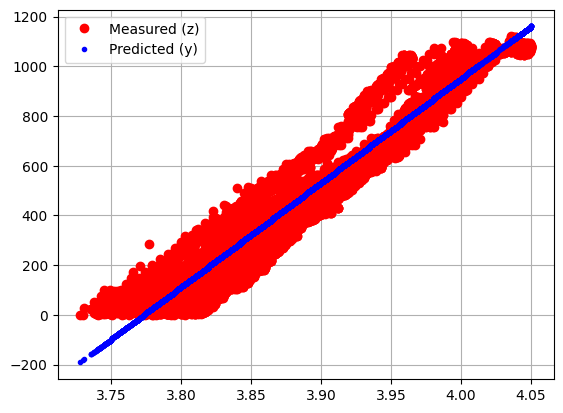

In [13]:
x = data['MaxVD'].values
z = data['RUL'].values
p1 = np.polyfit(x,z,1)
print('Slope, Intercept:' + str(p1))

plt.plot(x,z,'ro',label='Measured (z)')
plt.plot(x,np.polyval(p1,x),'b.',label='Predicted (y)')
plt.legend(); plt.grid()
plt.show()

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Multiple Linear Regression

Multiple linear regression uses more than one feature to predict the label.

In [14]:
x_columns = list(data.columns[1:-2])
z_column  = data.columns[-2]

x = data[x_columns]
z = data[z_column]

print('---Features---')
[print(x) for x in list(x_columns)]
print('---Label---')
print(z_column)

---Features---
Disch_s
Dec_3.6-3.4
MaxVD
MinVC
T4.15V
TCC_s
Charge_s
---Label---
RUL


`statsmodels` performs standard Ordinary Least Squares (OLS) analysis with an informative report summary.

```python
import statsmodels.api as sm
xc = sm.add_constant(x)
model = sm.OLS(z,xc).fit()
predictions = model.predict(xc)
model.summary()
```

The input `x` is augmented with a ones column so that it also predicts the intercept. This is accomplished with `xc=sm.add_constant(x)`. Perform a multiple linear regression with all of the data columns to predict `lnMFR`.

In [15]:
import statsmodels.api as sm
xc = sm.add_constant(x)
model = sm.OLS(z,xc).fit()
predictions = model.predict(xc)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RUL   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 9.259e+04
Date:                Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:21:35   Log-Likelihood:                -77597.
No. Observations:               14695   AIC:                         1.552e+05
Df Residuals:                   14687   BIC:                         1.553e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3430.4481     88.082    -38.946      0.000   -3603.099   -3257.797
Disch_s         0.6262      0.009     73.077      0.000       0.609       0.643
Dec_3.6-3.4    -0.1150      0.012     -9.608      0.000      -0.138      -0.092
MaxVD         702.5384     22.269     31.547      0.000     658.888     746.189
MinVC          51.4553      7.028      7.321      0.000      37.679      65.232
T4.15V          0.0363      0.006      6.537      0.000       0.025       0.047
TCC_s          -0.0089      0.005     -1.844      0.065      -0.018       0.001
Charge_s        0.0085      0.001      6.611      0.000       0.006       0.011
==============================================================================
Omnibus:                     2388.225   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15080.790
Skew:                           0.629   Prob(JB):                         0.00
Kurtosis:                       7.801   Cond. No.                     2.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Scale Data

Many regression algorithms require scaled data to perform well (e.g. Artificial Neural Networks). Scale data with the Standard Scalar from scikit-learn.

In [16]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
ds = s.fit_transform(data)
type(ds)

numpy.ndarray

The value `ds` is returned as a `numpy` array so we need to convert it back to a `pandas` `DataFrame`.

```python
ds = pd.DataFrame(ds,columns=data.columns)
```

Re-use the column names from `data`.

In [17]:
ds = pd.DataFrame(ds,columns=data.columns)
# restore ID value
ds['ID'] = data['ID'].values
ds.head()

,Cycle,Disch_s,Dec_3.6-3.4,MaxVD,MinVC,T4.15V,TCC_s,Charge_s,RUL,ID
0,-1.704337,1.789029,2.435850,1.828945,2.737570,-0.816968,-0.641335,-3.506653,1.712417,1
1,-1.701205,1.784390,2.435845,1.883706,-1.798789,1.818558,1.774628,1.583479,1.709285,1
2,-1.698074,1.777359,2.407937,1.883706,-1.790197,1.818556,1.769399,1.560957,1.706154,1
3,-1.694942,1.768032,2.380030,1.897397,-1.790197,1.812814,1.764147,1.477620,1.703023,1
4,-1.691810,1.762579,2.352117,1.911087,-1.790197,1.801360,1.758896,1.480683,1.699891,1


![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Divide Data

Data is divided into train and test sets to separate a fraction of the rows for evaluating classification or regression models. A typical split is 80% for training and 20% for testing, although the range depends on how much data is available and the objective of the study.

The `train_test_split` is a function in `sklearn` for the specific purpose of splitting data into train and test sets.

```python
from sklearn.model_selection import train_test_split
train,test = train_test_split(ds, test_size=0.2, shuffle=True)
```

There are options such as `shuffle=True` to randomize the selection in each set. 

In [18]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(ds, test_size=0.2, shuffle=True)
print(len(train),len(test))

11756 2939


For this data set, it is better to split by battery ID than randomly. Otherwise, data from all batteries are used for training and testing. A split by battery ID is better to observe the test performance on battery data not used for training.

In [19]:
ids = ds['ID'].unique()
total = len(ids)
split = int(np.floor(total*0.8))
train_ids = ids[0:split]
test_ids = ids[split:]

train = ds[ds['ID'].isin(train_ids)]
test = ds[ds['ID'].isin(test_ids)]
print(train_ids)
print(f'Train Data: {len(train)}')
print(test_ids)
print(f'Test Data: {len(test)}')

[ 1  2  3  4  5  6  7  8  9 10 11]
Train Data: 11586
[12 13 14]
Test Data: 3109


### Select Best Features

Rank the features to determine the best set that predicts `RUL`. There is additional information on [Select K Best Features](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html).

In [20]:
# select features
x_columns = list(train.columns[1:-2])
# select label (RUL)
z_column  = train.columns[-2]
x = train[x_columns]
z = train[z_column]

<BarContainer object of 7 artists>

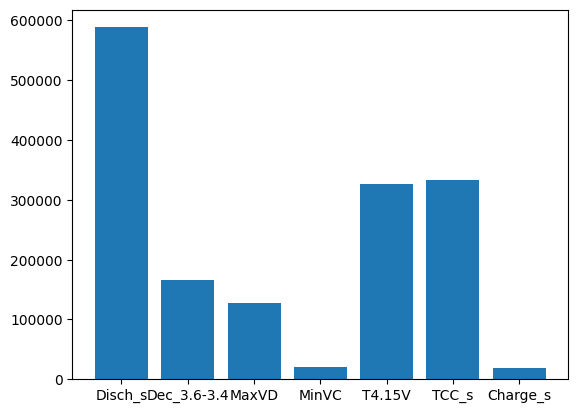

In [21]:
from sklearn.feature_selection import SelectKBest, f_regression
best = SelectKBest(score_func=f_regression, k='all')
fit = best.fit(x,z)
plt.bar(x=x.columns,height=fit.scores_)

In [22]:
# remove lowest scoring features
x_columns = list(train.columns[1:-2])
x_columns.remove('MinVC')
x_columns.remove('Charge_s')

# build train set
xtrain = train[x_columns]
ytrain = train[z_column]

# build test set
xtest = test[x_columns]
ytest = test[z_column]

![exercise](https://apmonitor.com/che263/uploads/Begin_Python/exercise.png)

### Regression

Machine learning is computer algorithms and statistical models that rely on patterns and inference. They perform a specific task without explicit instructions. Machine learned regression models can be as simple as linear regression or as complex as deep learning. This tutorial demonstrates several regression methods with `scikit-learn` and the `lazypredict` package.

In [23]:
# pip install lazypredict

In [25]:
# Evaluate many regressors
import lazypredict
from lazypredict.Supervised import LazyRegressor

# Remove regressors that take too long with big data sets
for r in lazypredict.Supervised.REGRESSORS:
    if r[0]=='QuantileRegressor':
        lazypredict.Supervised.REGRESSORS.remove(r)
        
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(xtrain, xtest, ytrain, ytest)
models

100%|██████████| 41/41 [02:08<00:00,  3.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1262
[LightGBM] [Info] Number of data points in the train set: 11586, number of used features: 5
[LightGBM] [Info] Start training from score -0.002795


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KernelRidge,0.96,0.96,0.20,19.79
ElasticNetCV,0.96,0.96,0.20,0.66
Ridge,0.96,0.96,0.20,0.03
RidgeCV,0.96,0.96,0.20,0.03
BayesianRidge,0.96,0.96,0.20,0.19
LassoLarsIC,0.96,0.96,0.20,0.03
Lars,0.96,0.96,0.20,0.03
TransformedTargetRegressor,0.96,0.96,0.20,0.04
LinearRegression,0.96,0.96,0.20,0.02


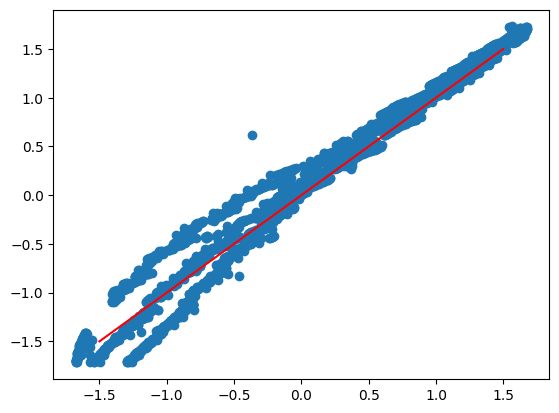

In [26]:
# predict with kernel ridge regressor
from sklearn.kernel_ridge import KernelRidge
kr = KernelRidge(kernel='rbf', alpha=1.0)
kr.fit(xtrain, ytrain)
yp = kr.predict(xtest)
# show results with parity plot
plt.scatter(yp,ytest)
plt.plot([-1.5,1.5],[-1.5,1.5],'r-')

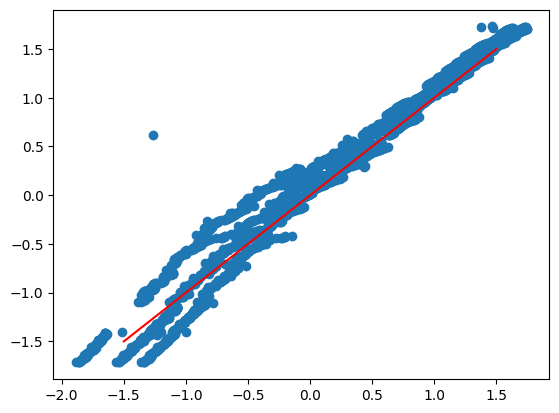

In [27]:
# predict with linear regressor
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain)
yp = lr.predict(xtest)
# show results with parity plot
plt.scatter(yp,ytest)
plt.plot([-1.5,1.5],[-1.5,1.5],'r-')

### View Remaining Useful Life (Unscaled) on Test Batteries

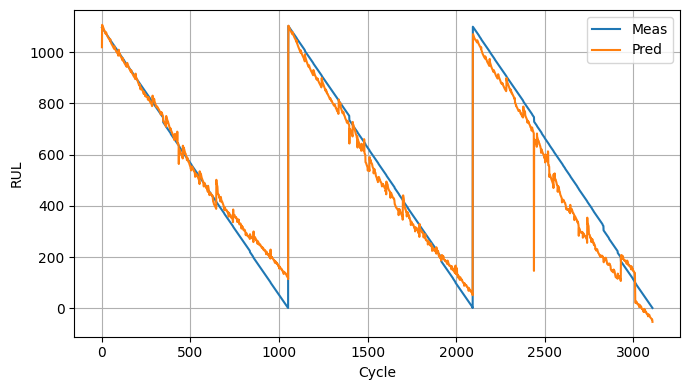

In [28]:
# view RUL on test batteries
pred = test.copy()
pred['RUL'] = yp

df1 = s.inverse_transform(test)
dtest = pd.DataFrame(df1,columns=test.columns)
df2 = s.inverse_transform(pred)
dpred = pd.DataFrame(df2,columns=test.columns)

plt.figure(figsize=(7,4))
plt.plot(dtest.index,dtest['RUL'],label='Meas')
plt.plot(dpred.index,dpred['RUL'],label='Pred')
plt.legend(); plt.xlabel('Cycle');plt.ylabel('RUL')
plt.grid(); plt.tight_layout()

### View Remaining Useful Life on Training Data Batteries

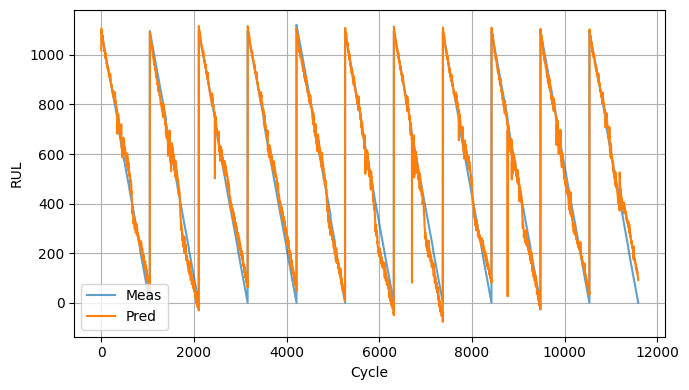

In [29]:
# view RUL on training batteries
pred = train.copy()
yp = lr.predict(xtrain)
pred['RUL'] = yp

df1 = s.inverse_transform(train)
dtrain = pd.DataFrame(df1,columns=train.columns)
df2 = s.inverse_transform(pred)
dpred = pd.DataFrame(df2,columns=train.columns)

plt.figure(figsize=(7,4))
plt.plot(dtrain.index,dtrain['RUL'],label='Meas',alpha=0.7)
plt.plot(dpred.index,dpred['RUL'],label='Pred')
plt.legend(); plt.xlabel('Cycle');plt.ylabel('RUL')
plt.grid(); plt.tight_layout()

### Regression with PyTorch

R^2 score for training data: 0.9676628147369464
R^2 score for test data: 0.9615898232055315


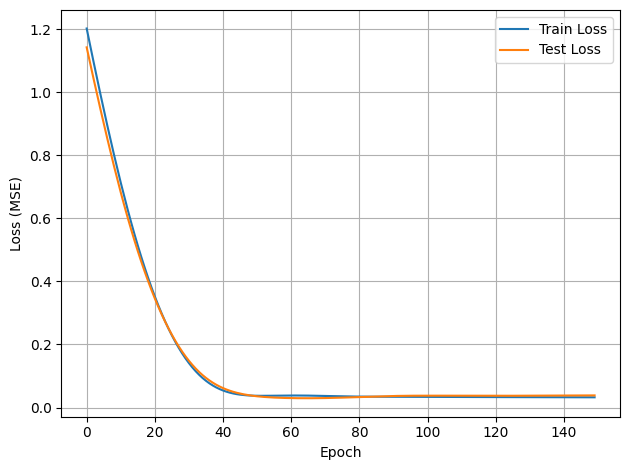

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Convert data to PyTorch tensors
xtrain_tensor = torch.tensor(xtrain.values, dtype=torch.float32)
ytrain_tensor = torch.tensor(ytrain.values, dtype=torch.float32).view(-1, 1)
xtest_tensor = torch.tensor(xtest.values, dtype=torch.float32)
ytest_tensor = torch.tensor(ytest.values, dtype=torch.float32).view(-1, 1)

n = np.size(xtrain.values,1)

# Define the model
model = nn.Sequential(
    nn.Linear(n, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

# Lists to store losses
train_losses = []
test_losses = []

# Training Loop
for epoch in range(150):  # 150 epochs
    model.train()
    optimizer.zero_grad()
    train_outputs = model(xtrain_tensor)
    train_loss = criterion(train_outputs, ytrain_tensor)
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        test_outputs = model(xtest_tensor)
        test_loss = criterion(test_outputs, ytest_tensor)

    # Store losses
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())
    
# Calculate R^2 for training
model.eval()
with torch.no_grad():
    train_predictions = model(xtrain_tensor)
    r2_train = r2_score(ytrain_tensor.numpy(), train_predictions.numpy())
with torch.no_grad():
    test_predictions = model(xtest_tensor)
    r2_test = r2_score(ytest_tensor.numpy(), test_predictions.numpy())
print(f"R^2 score for training data: {r2_train}")
print(f"R^2 score for test data: {r2_test}")

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss (MSE)')
plt.legend(); plt.grid(); plt.tight_layout()
plt.show()

### Regression with Keras / TensorFlow

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R^2 score for training data: 0.9850664127039787
R^2 score for test data: 0.956075015326746


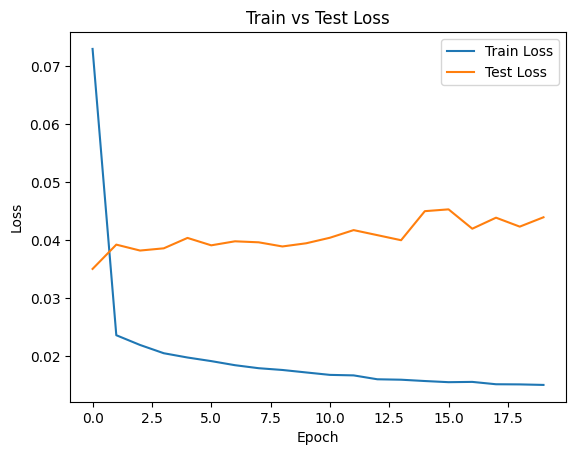

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# xtrain, ytrain, xtest, ytest defined above
n = np.size(xtrain.values,1)

# Define the model
# First hidden layer with 10 nodes
# input_dim=5 for n=5 features
model = Sequential([Dense(10, input_dim=n, activation='relu'),
                    Dense(1)])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.003),
              loss='mean_squared_error')

# Train the model
history = model.fit(xtrain, ytrain, epochs=20, batch_size=64,
                    verbose=0, validation_data=(xtest, ytest))

# Evaluate the model on the test set
test_loss = model.evaluate(xtest, ytest, verbose=0)

# Predict and calculate R^2 for training and test set
train_predictions = model.predict(xtrain)
test_predictions = model.predict(xtest)
r2_train = r2_score(ytrain, train_predictions)
r2_test = r2_score(ytest, test_predictions)
print(f"R^2 score for training data: {r2_train}")
print(f"R^2 score for test data: {r2_test}")

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Train vs Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()